## Türk Lirası Banknot Tanıma ##

## Kütüphaneleri Yükle ##

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Veri Setini Tanımla ##

In [2]:
labels=['5','10','20','50','100','200']
img_path='/kaggle/input/turkish-lira-banknote-dataset/'
#/kaggle/input/turkish-lira-banknote-dataset/10
#/kaggle/input/turkish-lira-banknote-dataset/5
#/kaggle/input/turkish-lira-banknote-dataset/5/5_1_0001.png

In [3]:
# DF için img ve label listesi
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [4]:
df=pd.DataFrame({'path':img_list,'label':label_list})
df.head()

,path,label
0,/kaggle/input/turkish-lira-banknote-dataset/5/...,5
1,/kaggle/input/turkish-lira-banknote-dataset/5/...,5
2,/kaggle/input/turkish-lira-banknote-dataset/5/...,5
3,/kaggle/input/turkish-lira-banknote-dataset/5/...,5
4,/kaggle/input/turkish-lira-banknote-dataset/5/...,5


## EDA ##

In [5]:
df.sample(5)

,path,label
338,/kaggle/input/turkish-lira-banknote-dataset/5/...,5
2415,/kaggle/input/turkish-lira-banknote-dataset/20...,20
954,/kaggle/input/turkish-lira-banknote-dataset/5/...,5
4633,/kaggle/input/turkish-lira-banknote-dataset/10...,100
1195,/kaggle/input/turkish-lira-banknote-dataset/10...,10


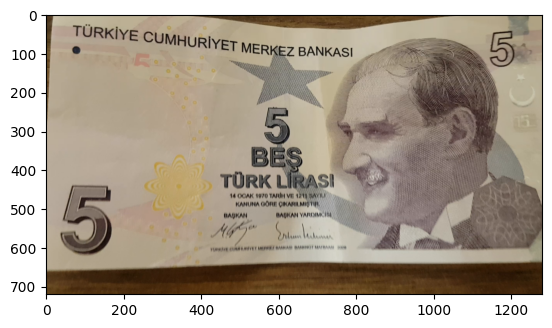

In [6]:
from PIL import Image
img=Image.open('/kaggle/input/turkish-lira-banknote-dataset/5/5_1_0001.png')
#img
plt.imshow(img)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6000 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


## Etiektleri Label Encoding ##

In [8]:
d={'5':0, '10':1,
  '20':2, '50':3,
  '100':4, '200':5}

In [9]:
df['encode_labels']=df['label'].map(d)
#df.label.replece(d,inplace=True)
df

,path,label,encode_labels
0,/kaggle/input/turkish-lira-banknote-dataset/5/...,5,0
1,/kaggle/input/turkish-lira-banknote-dataset/5/...,5,0
2,/kaggle/input/turkish-lira-banknote-dataset/5/...,5,0
3,/kaggle/input/turkish-lira-banknote-dataset/5/...,5,0
4,/kaggle/input/turkish-lira-banknote-dataset/5/...,5,0
...,...,...,...
5995,/kaggle/input/turkish-lira-banknote-dataset/20...,200,5
5996,/kaggle/input/turkish-lira-banknote-dataset/20...,200,5
5997,/kaggle/input/turkish-lira-banknote-dataset/20...,200,5
5998,/kaggle/input/turkish-lira-banknote-dataset/20...,200,5


## Etiket Dağılımı ##

<Axes: xlabel='label'>

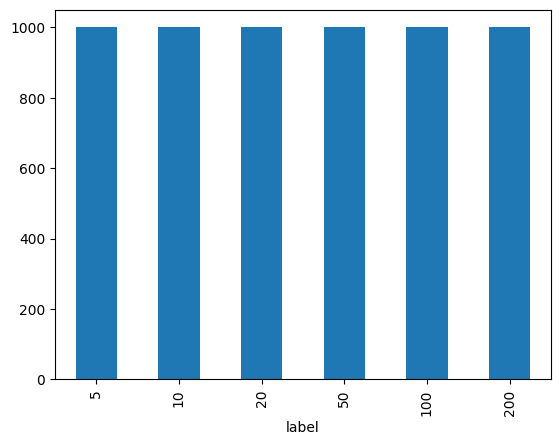

In [10]:
df['label'].value_counts().plot(kind='bar')

## Rastgele Örnekler Göster ##

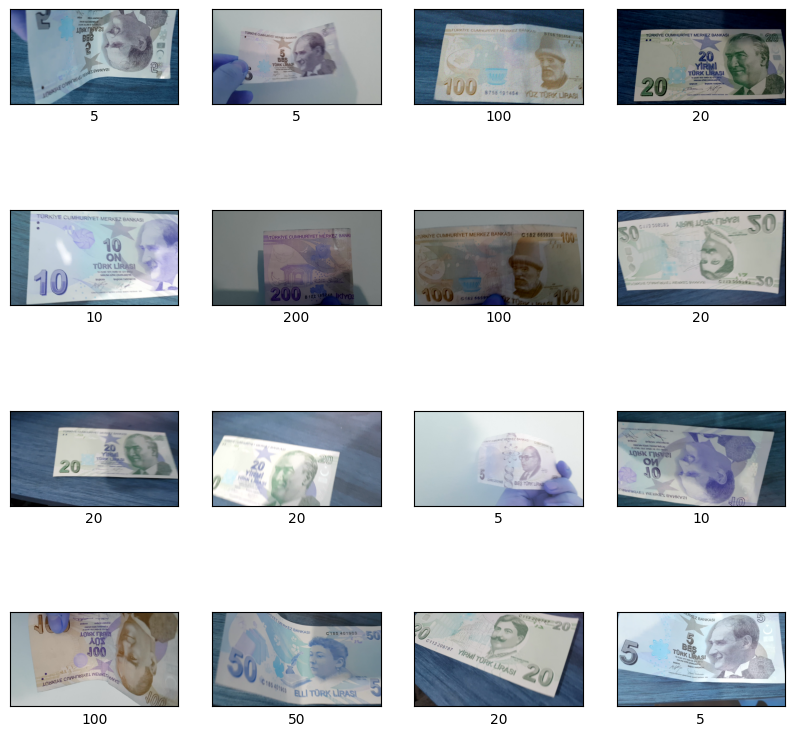

In [11]:
fig,ax=plt.subplots(4,4, figsize=(10,10))
df_sample=df.sample(16)
for i, axi in enumerate (ax.flat):
    axi.imshow(cv2.imread(str(df_sample['path'].iloc[i])))
    axi.set(xticks=[],yticks=[], xlabel=df_sample['label'].iloc[i])

## Rssimleri ön İşleme ##

In [13]:
X=[]
for img in df['path']:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))
    img=img/255.0
    X.append(img)

In [14]:
X=np.array(X)

In [ ]:
def img_preprocess(df):
    for img in df:
        img=cv2.imread(img)
        img=cv2.resize(img,(30,30))
        img=img/255.0
        X.append(img)
        X=np.array(X)
        return X
#img_preprocess(df['path'])

In [15]:
y=df['encode_labels']

## Veri setini Böl ##

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeli Oluştur ##

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Modeli oluştur
model = Sequential()

# Input katmanı
model.add(Input(shape=(30, 30, 3)))

# 1. Convential bloğu
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 2. Convential bloğu
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 3. Convential bloğu
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 4. Convential bloğu
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Modeli derle
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini yazdır
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,54

 Total params: 1,439,782 (5.49 MB)

 Trainable params: 1,438,246 (5.49 MB)

 Non-trainable params: 1,536 (6.00 KB)

## Modeli Eğit ##

In [20]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), #validation_split=0.2,
                    epochs=10,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.1887 - loss: 2.7415 - val_accuracy: 0.2367 - val_loss: 2.1902
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3802 - loss: 1.4883 - val_accuracy: 0.1842 - val_loss: 2.9843
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4272 - loss: 1.2734 - val_accuracy: 0.4783 - val_loss: 1.1431
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5191 - loss: 1.0794 - val_accuracy: 0.2725 - val_loss: 1.7279
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6023 - loss: 0.9458 - val_accuracy: 0.6975 - val_loss: 0.6632
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6920 - loss: 0.7413 - val_accuracy: 0.8100 - val_loss: 0.4661
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7800 - loss: 0.5808 - val_accuracy: 0.8825 - val_loss: 0.2741
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8422 - loss: 0.4335 - val_accuracy: 

In [21]:
model.save('model.h5')

## Mdoeli Değerlendir ##

In [22]:
#val üzerinden tahminleri yap ve karılaştır
y_pred_proba=model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [23]:
y_pred_proba

array([[7.4327448e-03, 9.8009562e-01, 9.0550189e-04, 9.8957587e-03,
        1.1722664e-05, 1.6587607e-03],
       [3.5649964e-03, 2.2198522e-01, 5.0198017e-03, 7.6295966e-01,
        1.0964846e-04, 6.3605923e-03],
       [9.9311650e-01, 1.3963258e-03, 4.5646662e-03, 2.7439132e-04,
        3.2792866e-04, 3.2007997e-04],
       ...,
       [4.4798970e-04, 1.5757557e-04, 9.9854124e-01, 2.3352286e-05,
        6.0323317e-04, 2.2665878e-04],
       [9.7056472e-05, 5.5086147e-03, 2.7446996e-04, 1.8141454e-03,
        8.0583515e-05, 9.9222517e-01],
       [1.4286793e-03, 9.8933512e-01, 2.4563857e-04, 8.0735404e-03,
        3.0219073e-06, 9.1395929e-04]], dtype=float32)

In [25]:
y_pred=np.argmax(y_pred_proba,axis=1)

In [26]:
df_cm=pd.DataFrame({'Gerçek Değerler':y_test,'Tahmin Edilen Değerler':y_pred})
df_cm

,Gerçek Değerler,Tahmin Edilen Değerler
1782,1,1
3917,3,3
221,0,0
2135,2,2
5224,5,5
...,...,...
2543,2,2
1773,1,1
2846,2,2
5799,5,5


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       215
           1       0.81      1.00      0.89       222
           2       0.90      1.00      0.95       176
           3       1.00      0.82      0.90       204
           4       1.00      0.93      0.96       189
           5       1.00      0.96      0.98       194

    accuracy                           0.94      1200
   macro avg       0.95      0.94      0.94      1200
weighted avg       0.95      0.94      0.94      1200



array([[198,   9,   8,   0,   0,   0],
       [  0, 222,   0,   0,   0,   0],
       [  0,   0, 176,   0,   0,   0],
       [  0,  36,   0, 168,   0,   0],
       [  1,   0,  12,   0, 176,   0],
       [  0,   8,   0,   0,   0, 186]])

In [ ]:
#y_test.replace({0:5,1:10,3:2,4:3,5:4,6:5},inplace=True)""

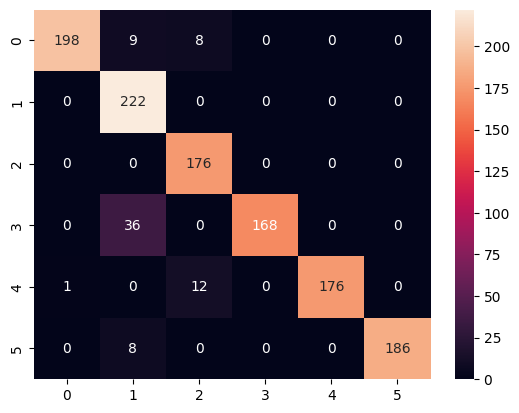

In [31]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt="d")
plt.show()